In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("raw_real_min_income.csv")

In [3]:
df

,COUNTRY,Country,SERIES,Series,PERIOD,Pay period,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,IRL,Ireland,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2001,2001,USD,US Dollar,0,Units,NaN,NaN,16423.708421,NaN,NaN
1,IRL,Ireland,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2002,2002,USD,US Dollar,0,Units,NaN,NaN,16486.908463,NaN,NaN
2,IRL,Ireland,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2003,2003,USD,US Dollar,0,Units,NaN,NaN,16665.709948,NaN,NaN
3,IRL,Ireland,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2004,2004,USD,US Dollar,0,Units,NaN,NaN,17847.836597,NaN,NaN
4,IRL,Ireland,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2005,2005,USD,US Dollar,0,Units,NaN,NaN,18627.892526,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,HRV,Croatia,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2018,2018,USD,US Dollar,0,Units,NaN,NaN,12184.282338,NaN,NaN
3104,HRV,Croatia,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2019,2019,USD,US Dollar,0,Units,NaN,NaN,13178.638357,NaN,NaN
3105,HRV,Croatia,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2020,2020,USD,US Dollar,0,Units,NaN,NaN,14274.087628,NaN,NaN
3106,HRV,Croatia,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2021,2021,USD,US Dollar,0,Units,NaN,NaN,14543.411602,NaN,NaN


In [16]:
df.loc[(df["Country"] == "United States") & (df["Time"] == 2020)]

,COUNTRY,Country,SERIES,Series,PERIOD,Pay period,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
305,USA,United States,PPP,In 2022 constant prices at 2022 USD PPPs,A,Annual,2020,2020,USD,US Dollar,0,Units,NaN,NaN,17051.954134,NaN,NaN
965,USA,United States,EXR,In 2022 constant prices at 2022 USD exchange r...,H,Hourly,2020,2020,USD,US Dollar,0,Units,NaN,NaN,8.198055,NaN,NaN
1185,USA,United States,EXR,In 2022 constant prices at 2022 USD exchange r...,A,Annual,2020,2020,USD,US Dollar,0,Units,NaN,NaN,17051.954134,NaN,NaN
2175,USA,United States,PPP,In 2022 constant prices at 2022 USD PPPs,H,Hourly,2020,2020,USD,US Dollar,0,Units,NaN,NaN,8.198055,NaN,NaN


In [20]:
df_oup = df.loc[(df["SERIES"] == "PPP") & (df["Pay period"] == "Annual"), ["Country", "Time", "Value"]]

In [21]:
df_oup.set_index(["Country", "Time"]).index.is_unique

True

In [25]:
df_oup.to_csv("real_min_wage.csv", index=False)

In [27]:
df_oup["Time"].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [34]:
print(str([f'"{str(x)}"' for x in df_oup["Time"].unique()]))

['"2001"', '"2002"', '"2003"', '"2004"', '"2005"', '"2006"', '"2007"', '"2008"', '"2009"', '"2010"', '"2011"', '"2012"', '"2013"', '"2014"', '"2015"', '"2016"', '"2017"', '"2018"', '"2019"', '"2020"', '"2021"', '"2022"']


In [35]:
[str(x) for x in df_oup["Time"].unique()]

['2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [36]:
len(df_oup["Country"].unique())

36

In [41]:
import matplotlib.pyplot as plt

In [38]:
df_oup

,Country,Time,Value
0,Ireland,2001,16423.708421
1,Ireland,2002,16486.908463
2,Ireland,2003,16665.709948
3,Ireland,2004,17847.836597
4,Ireland,2005,18627.892526
...,...,...,...
3103,Croatia,2018,12184.282338
3104,Croatia,2019,13178.638357
3105,Croatia,2020,14274.087628
3106,Croatia,2021,14543.411602


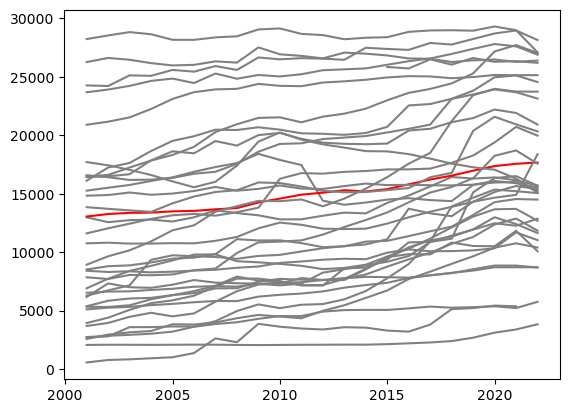

In [44]:
countries = df_oup.groupby("Country")
for country_name, country_df in countries:
    plt.plot(country_df["Time"], country_df["Value"], label=country_name, color="red" if country_name == "Japan" else "grey")
# plt.legend()